<a href="https://colab.research.google.com/github/jons455/ml4b/blob/main/Clustering_Jonas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install pickle5
import pickle5 as pickle
import re
!pip install tweet-preprocessor
import preprocessor as p#forming a separate feature for cleaned tweets
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from scipy.cluster.hierarchy import dendrogram

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
#with open('/content/digital_twin.plk', "rb") as fh:#  df = pickle.load(fh)

In [2]:
df = pd.read_csv('/content/digital_twin.csv',engine='python')

In [3]:
df = df.dropna()

In [4]:
df.head()

,Unnamed: 0,author_id,source,text,year,hashtag
0,0,5544032,Twitter Web Client,bajaj new growth engine literally bajaj auto u...,2007,[]
1,0,17278675,Twitter Web Client,twin cities tv viewers get ready digital twin ...,2008,[]
2,2,14263808,Twitter Web Client,would agree add products digital twin like tvs...,2008,[]
3,3,7105382,Twitter Web Client,tell trends digital twins skinny makeup fear k...,2008,[]
4,4,9776512,Twitter Web Client,good deal gb micro secure digital twin pack ki...,2008,[]


In [ ]:
"""
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [44]:
def txt_cleaner(text):
        
        text = text.encode(encoding="ascii", errors="ignore")
        text = text.decode() # removing unicode from the text 
        
        text = p.clean(text)
        
        text = text.lower() #lowering all the text
        
        punct = set(string.punctuation)
        text = "".join([ch for ch in text if ch not in punct]) #remove punctation
        
        
        stop_words = set(stopwords.words("english"))
        stop_words.add("amp")
        text = " ".join([word for word in text.split() if word not in stop_words]) #remove stopwords
        

        return text

### Take all Digital Twin Tweets from 2020

In [38]:
df20 = df[df['year'] == 2020]

In [7]:
df20 = df20.drop_duplicates(subset=['text'])

Take first 1000

In [8]:
df20 = df20.head(1000)

Take first **10000**

In [39]:
df20 = df20.head(10000)

In [45]:
df20['text'] = df20.text.map(txt_cleaner)

In [40]:
df20.shape

(10000, 6)

# Pyclustering with 1000 tweets

In [11]:
#!pip3 install pyclustering

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [101]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(df20.text)
text = tfidf.transform(df20.text)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


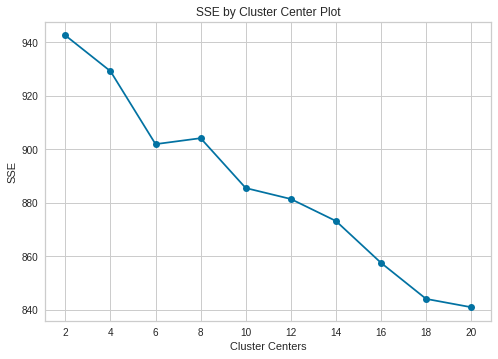

In [102]:
from sklearn.cluster import MiniBatchKMeans
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [103]:
clusters = MiniBatchKMeans(n_clusters=20, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

In [106]:
import numpy as np

In [109]:
df20.shape

(1000, 6)

In [111]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm

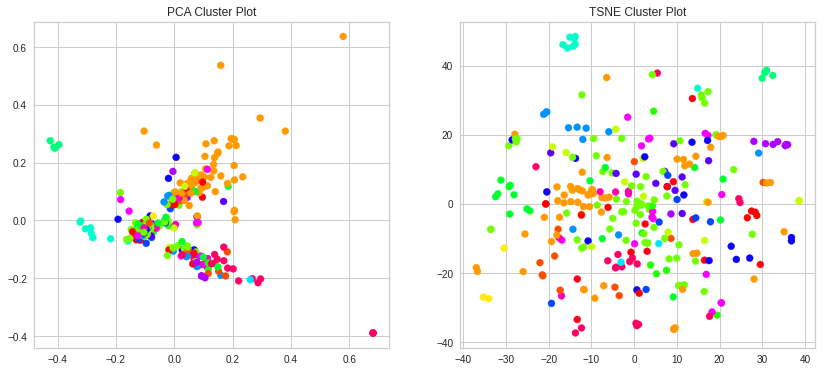

In [114]:
import matplotlib.cm as cm
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(df20.shape[0]), size=1000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [116]:
vectorizer = TfidfVectorizer()
df20['text'] = vectorizer.fit_transform(df20['text'])


AttributeError: ignored

In [66]:
vectorizer = TfidfVectorizer()
df20['source'] = vectorizer.fit_transform(df20['source'])


In [67]:
vectorizer = TfidfVectorizer()
df20['hashtag'] = vectorizer.fit_transform(df20['hashtag'])

In [68]:
df20.head()

,Unnamed: 0,author_id,source,text,year,hashtag
69544,0,99002747,"(0, 51)\t0.7071067811865476\n (0, 65)\t0.70...","(0, 523)\t0.42650432708119257\n (0, 3134)\t...",2020,"(0, 265)\t1.0\n (1, 823)\t0.688833982019465..."
69545,1,28119151,"(0, 51)\t0.7071067811865476\n (0, 65)\t0.70...","(0, 523)\t0.42650432708119257\n (0, 3134)\t...",2020,"(0, 265)\t1.0\n (1, 823)\t0.688833982019465..."
69546,3,1586881843,"(0, 51)\t0.7071067811865476\n (0, 65)\t0.70...","(0, 523)\t0.42650432708119257\n (0, 3134)\t...",2020,"(0, 265)\t1.0\n (1, 823)\t0.688833982019465..."
69547,4,1061963386571739137,"(0, 51)\t0.7071067811865476\n (0, 65)\t0.70...","(0, 523)\t0.42650432708119257\n (0, 3134)\t...",2020,"(0, 265)\t1.0\n (1, 823)\t0.688833982019465..."
69548,5,18764323,"(0, 51)\t0.7071067811865476\n (0, 65)\t0.70...","(0, 523)\t0.42650432708119257\n (0, 3134)\t...",2020,"(0, 265)\t1.0\n (1, 823)\t0.688833982019465..."


In [79]:
type(df20.text.iloc[0])

scipy.sparse.csr.csr_matrix

In [72]:
df_author = pd.DataFrame(df20['author_id'])

# Sklearn with 100 Tweets

In [46]:
 from sklearn.cluster import KMeans
 import numpy as np

In [47]:
vectorizer = TfidfVectorizer()
tfidf = df20['text']
tfidf = vectorizer.fit_transform(df20['text'])

In [48]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(tfidf)

KeyboardInterrupt: ignored

from https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py

In [49]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans

In [50]:
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                                 min_df=2, stop_words='english'
                              )

In [51]:
X = vectorizer.fit_transform(df20['text'])

In [52]:
print("n_samples: %d, n_features: %d" % X.shape)
print()

n_samples: 10000, n_features: 1000



In [53]:
km = KMeans(n_clusters=20, max_iter=100, n_init=5)

In [54]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=20, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [55]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

In [57]:
terms = vectorizer.get_feature_names()
for i in range(20):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

Cluster 0: project twin city learn new delivery research award development help
Cluster 1: learn twin latest read virtual world business iota help watch
Cluster 2: coffee talk iot episode cup chat things welcome thread lets
Cluster 3: join register webinar pm free th today november twin twins
Cluster 4: data new twin twins learn technologies platform use help physical
Cluster 5: twin earth virtual create working tech model consortium like physical
Cluster 6: future twin twins new technologies ai virtual data technology like
Cluster 7: great twin twins article team talk work good join really
Cluster 8: smart cities city twins building ontology twin iot urban buildings
Cluster 9: azure generally available iot twins solutions model environments world real
Cluster 10: market global analysis growth forecast size report twin twins billion
Cluster 11: bentley systems accelerate infrastructure microsoft alliance innovations expands twin twins
Cluster 12: industry twins twin construction techno

**AgglomerativeClustering**

In [65]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [62]:
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                                 min_df=2, stop_words='english'
                              )

In [63]:
X = vectorizer.fit_transform(df20['text'])

In [66]:
clustering = AgglomerativeClustering().fit(X.toarray())

In [68]:
terms = vectorizer.get_feature_names()

In [79]:

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

AttributeError: ignored

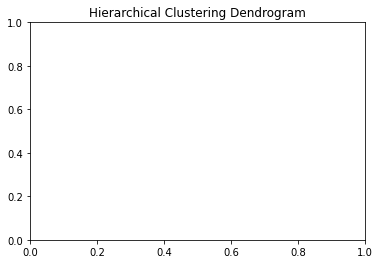

In [80]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [81]:
print(clustering.n_leaves_)
print(clustering.labels_)
print(clustering.n_clusters)
print(clustering.n_connected_components_)
print(clustering.distances_)


10000
[0 0 0 ... 0 0 0]
2
1


AttributeError: ignored

In [67]:
clustering.affinity 

'euclidean'

Elbow Method to find optimal clusters

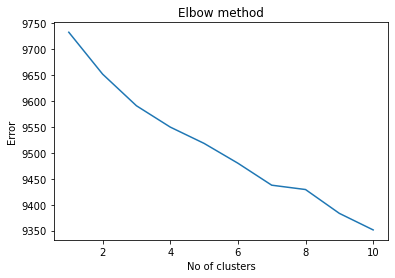

In [59]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

# Pyclustering with 1000 tweets

In [20]:
#!pip install pycaret 

In [75]:
from pycaret.clustering import *

exp_name = setup(data = df_author)

kmeans = create_model('kmeans',num_clusters=2)

kmeans_df = assign_model(kmeans)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9305,20905.0208,0.1578,0,0,0


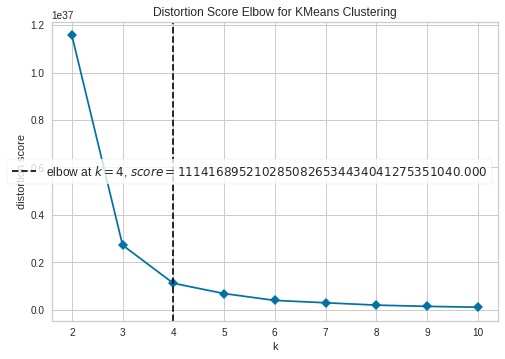

In [77]:
plot_model(kmeans, plot = 'elbow')

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [ ]:
kmeans.predict(X, embedding[11])

ValueError: ignored

In [ ]:
df['text'] = df.text.map(txt_cleaner)